In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tqdm import tqdm  # Ensure tqdm is imported

def extract_features(images):
    features = []
    for image_path in tqdm(images):
        try:
            img = load_img(image_path, color_mode='grayscale')  # Load image in grayscale
            img_array = img_to_array(img)  # Convert to NumPy array
            img_array = img_array / 255.0  # Normalize pixel values (optional but recommended)
            features.append(img_array)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")  # Print errors instead of silent failure
    return np.array(features)

# Example Usage:
# Assuming 'train' is a DataFrame and 'image' column contains image file paths.
train_features = extract_features(train['image'].tolist())  
print(f"Extracted Features Shape: {train_features.shape}")  # To check output



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28821/28821 [00:08<00:00, 3266.72it/s]


Extracted Features Shape: (28821, 48, 48, 1)


In [11]:


def extract_features(images):
    features = []
    for image_path in tqdm(images):
        try:
            img = load_img(image_path, color_mode='grayscale')  # Load image in grayscale
            img_array = img_to_array(img)  # Convert to NumPy array
            img_array = img_array / 255.0  # Normalize pixel values
            features.append(img_array)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")  # Print errors instead of failing
    return np.array(features)

# **Extract Test Features**
test_features = extract_features(test['image'].tolist())  
print(f"Extracted Test Features Shape: {test_features.shape}")  # To check output


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:02<00:00, 3202.95it/s]

Extracted Test Features Shape: (7066, 48, 48, 1)


In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

# Define the model
model = Sequential([
    Input(shape=(48, 48, 1)),  # Correct way to define input shape

    # Convolutional layers
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Conv2D(256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Flatten(),

    # Fully connected layers
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),

    # Output layer (7 classes for emotions)
    Dense(7, activation='softmax')
])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])  # Corrected: Metrics should be inside a list


In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
 51/226 ━━━━━━━━━━━━━━━━━━━━ 1:47 615ms/step - accuracy: 0.2389 - loss: 1.8640

KeyboardInterrupt: 

In [32]:
# Save model structure as JSON
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)

# Save model in the recommended `.keras` format
model.save("emotiondetector.keras")  # New format (recommended)

# If you still want to save as HDF5 (legacy format), use:
# model.save("emotiondetector.h5", save_format="h5")


In [33]:
from keras.models import model_from_json

In [36]:
from tensorflow.keras.models import model_from_json, Sequential
import os

# Define paths
json_path = "facialemotionmodel.json"
weights_path = "facialemotionmodel.h5"

if os.path.exists(json_path) and os.path.exists(weights_path):
    try:
        # Read and load the model structure from JSON
        with open(json_path, "r", encoding="utf-8") as json_file:
            model_json = json_file.read()

        # Register Sequential explicitly
        from tensorflow.keras.saving import register_keras_serializable

        @register_keras_serializable()
        class MySequential(Sequential):
            pass

        model = model_from_json(model_json, custom_objects={"Sequential": MySequential})  # Load with fix
        model.load_weights(weights_path)

        print("Model loaded successfully from JSON + HDF5!")

    except Exception as e:
        print(f"An error occurred while loading the model: {e}")
else:
    print("Error: Model file not found.")


Model loaded successfully from JSON + HDF5!


In [37]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [38]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [39]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define function to preprocess the image
def ef(image):
    img = load_img(image, color_mode='grayscale')  # Corrected argument
    img = img_to_array(img)  # Convert image to NumPy array
    img = img / 255.0  # Normalize pixel values (optional but recommended)
    img = img.reshape(1, 48, 48, 1)  # Reshape to match model input
    return img

# Example Usage:
image_path = 'images/test/sad/20.jpg'
print("Original image is of sad")

# Preprocess Image
img = ef(image_path)

# Ensure `model` and `label` are defined before using them
pred = model.predict(img)
pred_label = label[pred.argmax()]  # Ensure `label` is a valid list/dictionary
print("Model prediction is:", pred_label)


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Model prediction is: neutral


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model prediction is: sad


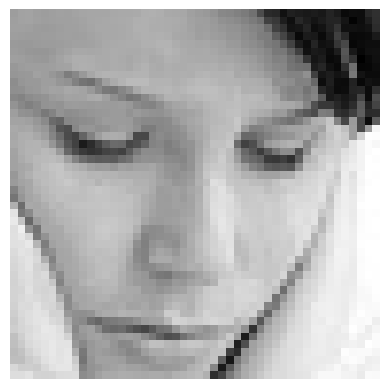

In [41]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to preprocess the image
def ef(image_path):
    img = load_img(image_path, color_mode='grayscale')  # Load in grayscale
    img_array = img_to_array(img)  # Convert image to array
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = img_array.reshape(1, 48, 48, 1)  # Reshape for model input
    return img_array, img  # Return both processed image and original image

# Image path
image_path = 'images/train/sad/42.jpg'

# Display original image
print("Original image is of sad")
img_processed, img_original = ef(image_path)

# Model Prediction
pred = model.predict(img_processed)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

# Display Image
plt.imshow(np.array(img_original).reshape(48, 48), cmap='gray')  # Use original image
plt.axis("off")  # Hide axis
plt.show()


Original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model prediction is: sad


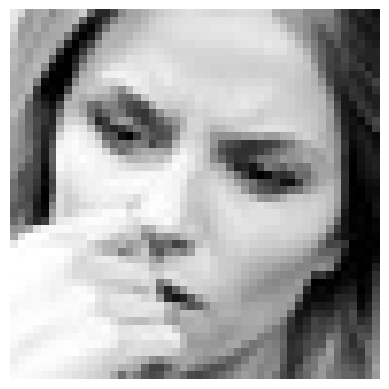

In [42]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image
def ef(image_path):
    img = load_img(image_path, color_mode='grayscale')  # Load image in grayscale
    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = img_array.reshape(1, 48, 48, 1)  # Reshape for model input
    return img_array, img  # Return processed & original image

# Image path
image_path = 'images/train/fear/2.jpg'
print("Original image is of fear")

# Preprocess image
img_processed, img_original = ef(image_path)

# Model Prediction
pred = model.predict(img_processed)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

# Display Image
plt.imshow(np.array(img_original).reshape(48, 48), cmap='gray')  # Use original image
plt.axis("off")  # Hide axis
plt.show()
